**YEDİHİLAL AI PROJESİ**


*   Muhammet Mustafa SAĞLAM
*   Salih ÖNALDI

*   Yusuf Ali GÜNDOĞDU






# **1. Gerekli Kütüphaneleri İçe Aktarama**

In [1]:
# Terminal çıktılarını gizlemek için " %%capture output " kullandık
%%capture output
!pip install ydata-profiling # Veri setlerine hızlıca görsel analiz yapmaktadır.
!pip install catboost # catboost modelini Jupyter Notebook'a indirdik

UsageError: Line magic function `%%capture` not found.


In [1]:
# Gerekli kütüphaneleri import ediyoruz.
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm
from scipy import stats
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

# **2. Bird Strike Veri Seti İnceleme ve Görselleştirme**

### 2.1. Bird Strike Veri Setini Görüntüleyelim

In [2]:
df = pd.read_csv('bird_strikes.csv') # "bird_strikes.csv" dosyasını okuyarak bir DataFrame oluşturuyoruz.
pd.set_option('display.max_columns', None)  # Sütun sayısını sınırlamasını kaldırıyoruz.
df.head() # DataFrame'in ilk 5 satırını görüntülüyoruz.


,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False


In [3]:
df.shape # Veri setinin boyutunu öğrendik

(25558, 26)

In [4]:
df.info() # Veri setinin temel bilgilerini görüntüledik

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   record_id                                25558 non-null  int64  
 1   aircraft_type                            25429 non-null  object 
 2   airport_name                             25429 non-null  object 
 3   altitude_bin                             25429 non-null  object 
 4   aircraft_make_model                      25558 non-null  object 
 5   wildlife_number_struck                   25429 non-null  object 
 6   wildlife_number_struck_actual            25558 non-null  int64  
 7   effect_impact_to_flight                  2078 non-null   object 
 8   flightdate                               25429 non-null  object 
 9   effect_indicated_damage                  25558 non-null  object 
 10  aircraft_number_of_engines               25291

In [5]:
# Veri çerçevesinin sütunlarının adlarını ve veri tiplerini alt alta yazdırdık
columns = df.columns

for i in range(len(columns)):
    # Sütun adını ve veri tipini bir arada virgül ile ayırarak yazdırma işlemi
    print(f"{columns[i]}, {df[columns[i]].dtype}")


record_id, int64
aircraft_type, object
airport_name, object
altitude_bin, object
aircraft_make_model, object
wildlife_number_struck, object
wildlife_number_struck_actual, int64
effect_impact_to_flight, object
flightdate, object
effect_indicated_damage, object
aircraft_number_of_engines, object
aircraft_airline_operator, object
origin_state, object
when_phase_of_flight, object
conditions_precipitation, object
remains_of_wildlife_collected, bool
remains_of_wildlife_sent_to_smithsonian, bool
remarks, object
wildlife_size, object
conditions_sky, object
wildlife_species, object
pilot_warned_of_birds_or_wildlife, object
cost_total, int64
feet_above_ground, float64
number_of_people_injured, int64
is_aircraft_large, object


### 2.2. Bird Strike Veri Setinde NaN Değer Kontrolü Yapalım

In [6]:
df.isna().sum() # NaN değer kontorlü

record_id                                      0
aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make_model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23480
flightdate                                   129
effect_indicated_damage                        0
aircraft_number_of_engines                   267
aircraft_airline_operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23543
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species    

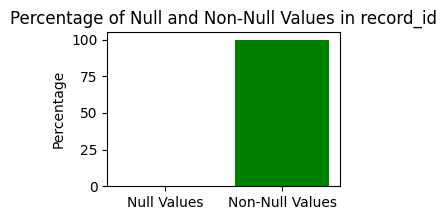

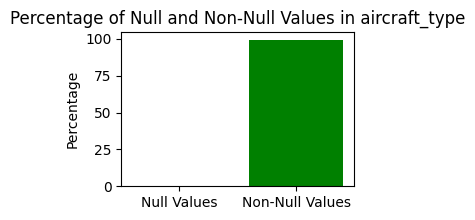

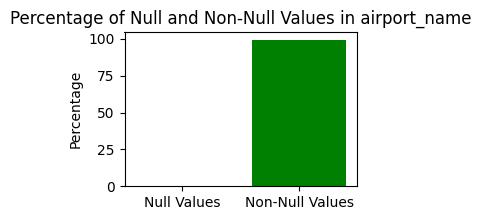

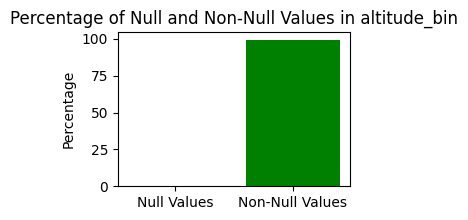

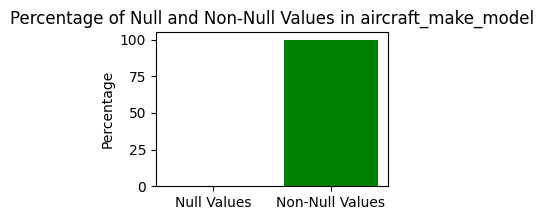

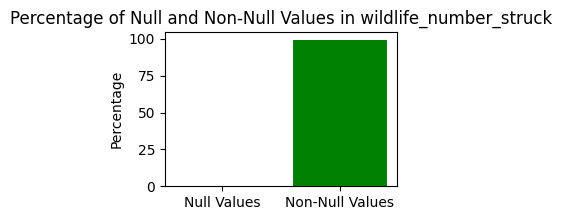

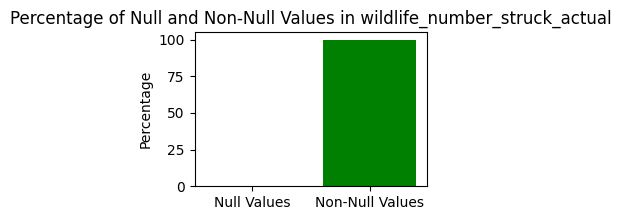

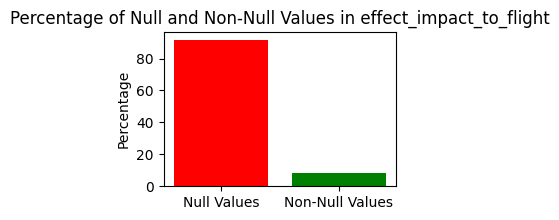

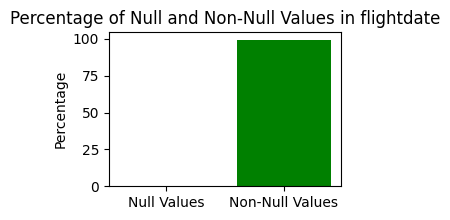

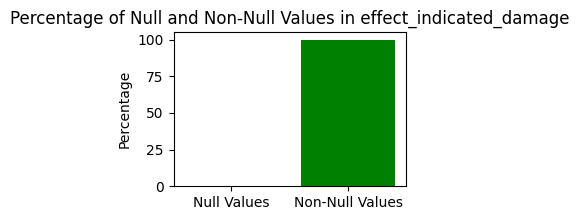

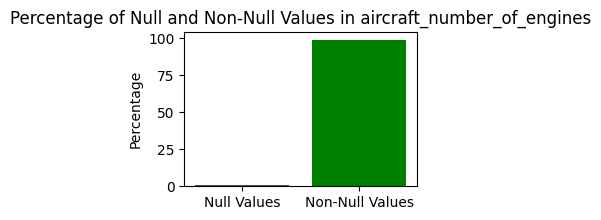

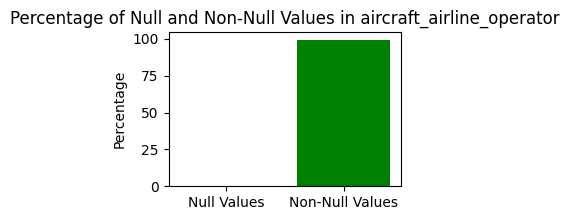

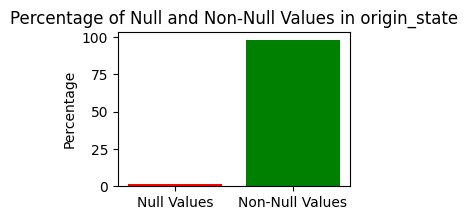

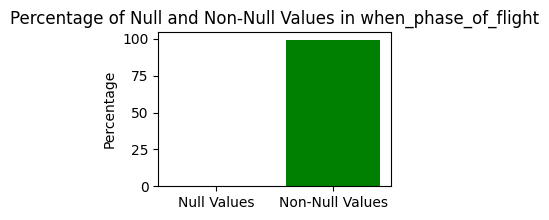

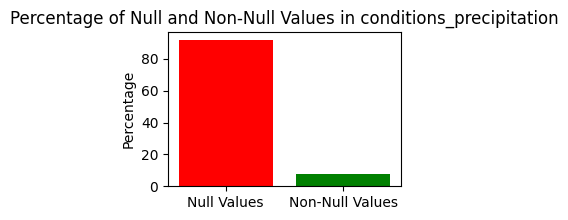

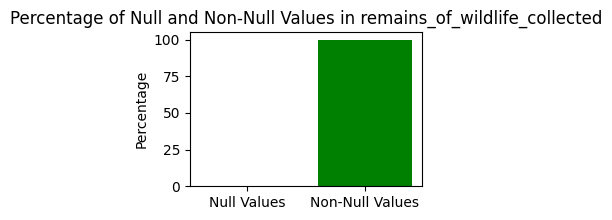

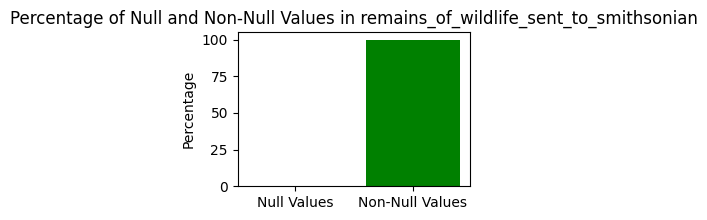

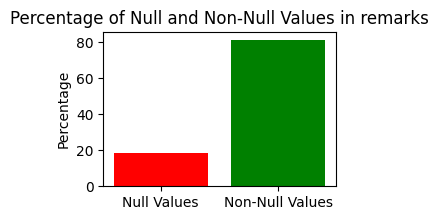

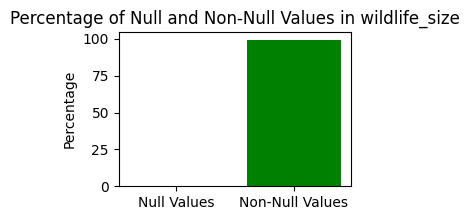

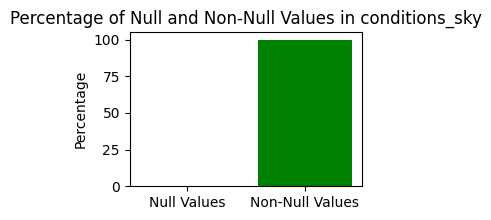

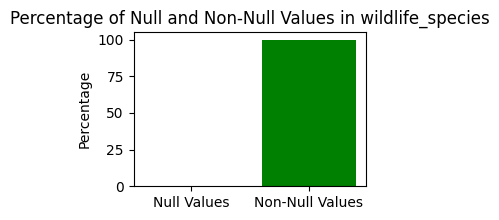

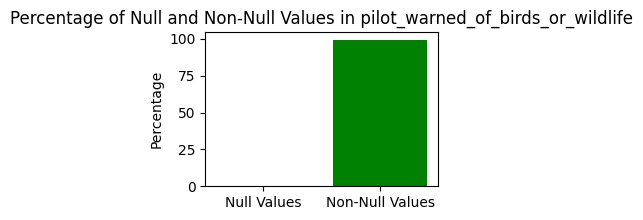

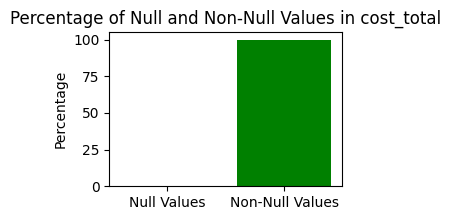

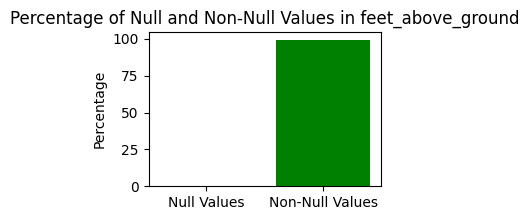

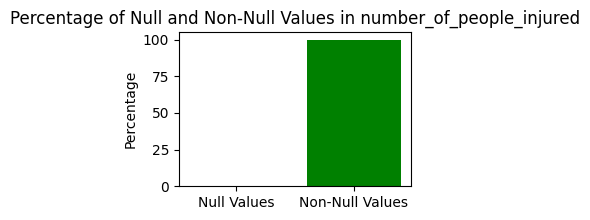

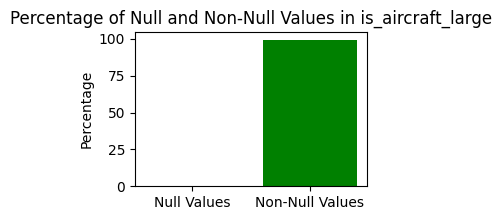

In [7]:
column_list = df.columns # Veri setindeki sütun adlarını aldık
total_count = len(df) # Veri setindeki toplam satır sayısını aldık
for i in range(len(column_list)):
    null_count = df[column_list[i]].isnull().sum() # Sütundaki eksik değerlerin sayısını hesapladık
    non_null_count = df[column_list[i]].notnull().sum() # Sütundaki eksik olmayan değerlerin sayısını hesapladık
    null_percentage = (null_count / total_count) * 100 # Eksik değerlerin yüzdesini hesapladık
    non_null_percentage = (non_null_count / total_count) * 100 # Eksik olmayan değerlerin yüzdesini hesapladık
    plt.figure(figsize=(3, 2)) # Bar grafik oluşturduk
    plt.bar(['Null Values', 'Non-Null Values'], [null_percentage, non_null_percentage], color=['red', 'green']) # Grafik başlığı
    plt.title(f'Percentage of Null and Non-Null Values in {column_list[i]}')
    plt.ylabel('Percentage') # Y ekseni etiketini ayarladık
    plt.show()


###  2.3. Bird Strike Veri Setini Daha Detaylı Görebilmek İçin ProfileReport Kullanalım

In [8]:
profile = ProfileReport(df, title= 'Bird Strike_Veri') #  Detaylı veri profili raporu oluşturduk
profile.to_notebook_iframe() # Jupyter Notebook'ta Görüntüleme

NameError: name 'ProfileReport' is not defined

**Yukarıdaki ek bilgiler sayesinde verimizi incelerken çok daha fazla bilgiye hızlıca ulaştık ve kullandık.**

# **3. Bird Strike Veri Seti Sütun İşlemleri**


## 3.1. 'flightdate' Sütun İşlemleri

In [9]:
df

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23T00:00:00,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25T00:00:00,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14T00:00:00,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05T00:00:00,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23T00:00:00,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30T00:00:00,No damage,2,SKYWEST AIRLINES,California,Approach,Fog,False,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,False,0,1500.0,0,False
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30T00:00:00,No damage,2,US AIRWAYS,Florida,Landing Roll,NaN,False,False,NaN,Small,Some Cloud,Tree swallow,True,0,0.0,0,False
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaN,No damage,NaN,NaN,Virginia,NaN,NaN,False,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31T00:00:00,No damage,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,False,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,True,0,0.0,0,True


In [10]:
unique_values = df['flightdate'].unique() # 'flightdate' sütununun Unique(benzersiz) değerlerini inceliyoruz.
unique_values

array(['2000-11-23T00:00:00', '2001-07-25T00:00:00',
       '2001-09-14T00:00:00', ..., '2011-12-19T00:00:00',
       '2011-12-21T00:00:00', '2011-12-26T00:00:00'], dtype=object)

'flightdate' **içinde bulunan bir tarih/saat bilgilerini daha ayrıntılı tarih ve saat bileşenlerine böldük.**

In [11]:
df['flightdate'] = pd.to_datetime(df['flightdate'], format='%Y-%m-%dT%H:%M:%S', errors='coerce') # 'flightdate' sütunundaki tarih/saat verisini uygun biçime dönüştürdük
df['year'] = df['flightdate'].dt.year # Yıl bilgisini içeren yeni bir 'year' sütunu oluşturduk
df['month'] = df['flightdate'].dt.month # Ay bilgisini içeren yeni bir 'month' sütunu oluşturduk
df['day'] = df['flightdate'].dt.day # Gün bilgisini içeren yeni bir 'day' sütunu oluşturduk
df['hour'] = df['flightdate'].dt.hour # Saat bilgisini içeren yeni bir 'hour' sütunu oluşturduk
df['minute'] = df['flightdate'].dt.minute # Dakika bilgisini içeren yeni bir 'minute' sütunu oluşturduk
df['second'] = df['flightdate'].dt.second  # Saniye bilgisini içeren yeni bir 'second' sütunu oluşturduk
df

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,flightdate,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,hour,minute,second
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True,2000.0,11.0,23.0,0.0,0.0,0.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False,2001.0,7.0,25.0,0.0,0.0,0.0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False,2001.0,9.0,14.0,0.0,0.0,0.0
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True,2002.0,9.0,5.0,0.0,0.0,0.0
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False,2003.0,6.0,23.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,2,SKYWEST AIRLINES,California,Approach,Fog,False,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,False,0,1500.0,0,False,2011.0,12.0,30.0,0.0,0.0,0.0
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,2,US AIRWAYS,Florida,Landing Roll,NaN,False,False,NaN,Small,Some Cloud,Tree swallow,True,0,0.0,0,False,2011.0,12.0,30.0,0.0,0.0,0.0
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,NaN,NaN,Virginia,NaN,NaN,False,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,False,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,True,0,0.0,0,True,2011.0,12.0,31.0,0.0,0.0,0.0


In [12]:
# 'hour' , 'minute' , 'second'
# Kolonlarının Unique(benzersiz) değerlerini inceliyoruz.
unique_values1 = df['hour'].unique()
unique_values_2 = df['minute'].unique()
unique_values_3 = df['second'].unique()

# Unique değerleri
print(unique_values1, unique_values_2, unique_values_3)

[ 0. nan] [ 0. nan] [ 0. nan]


**Görüldüğü üzere** # 'hour' , 'minute' , 'second' **sütunalrındaki değerler önemsizdir. Bundan dolayı bu sütunları siliyoruz.**

In [13]:
# 'flightdate','hour', 'minute', 'second' sütunlarını sildik
df = df.drop(['flightdate','hour', 'minute', 'second'], axis=1)
df

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,Caused damage,2,US AIRWAYS*,New York,Climb,NaN,False,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,False,30736,1500.0,0,True,2000.0,11.0,23.0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,Caused damage,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,False,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,True,0,0.0,0,False,2001.0,7.0,25.0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,No damage,2,BUSINESS,Louisiana,Approach,NaN,False,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,False,0,50.0,0,False,2001.0,9.0,14.0
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,No damage,2,ALASKA AIRLINES,Washington,Climb,NaN,True,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,True,0,50.0,0,True,2002.0,9.0,5.0
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,No damage,2,COMAIR AIRLINES,Virginia,Approach,NaN,False,False,NO DMG REPTD.,Small,No Cloud,European starling,False,0,50.0,0,False,2003.0,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,No damage,2,SKYWEST AIRLINES,California,Approach,Fog,False,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,False,0,1500.0,0,False,2011.0,12.0,30.0
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,No damage,2,US AIRWAYS,Florida,Landing Roll,NaN,False,False,NaN,Small,Some Cloud,Tree swallow,True,0,0.0,0,False,2011.0,12.0,30.0
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,No damage,NaN,NaN,Virginia,NaN,NaN,False,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN,NaN,NaN,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,No damage,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,False,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,True,0,0.0,0,True,2011.0,12.0,31.0


## 3.2. Diğer Sütun İşlemleri

'remains_of_wildlife_collected', 'remains_of_wildlife_sent_to_smithsonian', 'pilot_warned_of_birds_or_wildlife', 'is_aircraft_large' ve 'No_Damage_Flag'        
  **Sütunlarının içindeki veriler boolean (True/False) değerlere dönüştürülmüştür.**

In [14]:
# 'remarks' sütununda 'NO DMG' ifadesini içeren satırları tespit ederek yeni bir boolean sütun oluşturduk
df['No_Damage_Flag'] = df['remarks'].str.contains('NO DMG', case=False)
# Boolean değere dönüştürülecek sütunların listesi
bool_columns_list = [
    'remains_of_wildlife_collected',
    'remains_of_wildlife_sent_to_smithsonian',
    'pilot_warned_of_birds_or_wildlife',
    'is_aircraft_large',
    'No_Damage_Flag'
]
# Belirtilen sütunları dönüştürme döngüsü
for i in range(len(bool_columns_list)):
# Sütunu boolean değere dönüştürme ve Boolean değeri tamsayıya dönüştürme (True -> 1, False -> 0)
    df[bool_columns_list[i]] = df[bool_columns_list[i]].astype(bool).astype(int)

'effect_indicated_damage' ve 'aircraft_number_of_engines' **Sütunları yeniden biçimlendirilmiştir.**

In [15]:
df['effect_indicated_damage'] = df['effect_indicated_damage'].replace({'Caused damage': 1, 'No damage': 0}).astype(int) # 'effect_indicated_damage' sütununu yeniden biçimlendirme
df['aircraft_number_of_engines'] = df['aircraft_number_of_engines'].replace({'C': 2}) # C means coupled(turboprob) and for 2 engines

In [16]:
df

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,1,2,US AIRWAYS*,New York,Climb,NaN,0,0,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,0,30736,1500.0,0,1,2000.0,11.0,23.0,0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,1,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,0,0,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,1,0,0.0,0,0,2001.0,7.0,25.0,0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,0,2,BUSINESS,Louisiana,Approach,NaN,0,0,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,0,0,50.0,0,0,2001.0,9.0,14.0,1
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,0,2,ALASKA AIRLINES,Washington,Climb,NaN,1,0,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,1,0,50.0,0,1,2002.0,9.0,5.0,1
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,0,2,COMAIR AIRLINES,Virginia,Approach,NaN,0,0,NO DMG REPTD.,Small,No Cloud,European starling,0,0,50.0,0,0,2003.0,6.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,0,2,SKYWEST AIRLINES,California,Approach,Fog,0,0,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,0,0,1500.0,0,0,2011.0,12.0,30.0,1
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,0,2,US AIRWAYS,Florida,Landing Roll,NaN,0,0,NaN,Small,Some Cloud,Tree swallow,1,0,0.0,0,0,2011.0,12.0,30.0,1
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,0,NaN,NaN,Virginia,NaN,NaN,0,0,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,1,0,NaN,0,1,NaN,NaN,NaN,0
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,0,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,0,0,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,1,0,0.0,0,1,2011.0,12.0,31.0,1


## 3.3. 'aircraft_make_model' Sütun İşlemleri

In [17]:
# 'aircraft_type' sütunundaki unique (benzersiz) değerleri alın
unique_values = df['aircraft_number_of_engines'].unique()
unique_values

array(['2', '3', '4', nan, '1', 2], dtype=object)

In [18]:
nan_engine_rows = df[df['aircraft_number_of_engines'].isna()] # NaN içeren satırlardaki 'aircraft_make_model' verilerini çekiyoruz

unique_make_models = nan_engine_rows['aircraft_make_model'].unique()
print(unique_make_models)

['B-52H' 'C-17A' 'AT-38B' 'T-38A' 'C-21A' 'C-130E' 'A-10A' 'F-16D'
 'CRJ-440' 'MISC - OTHER' 'CESSNA UNKN' 'CITATION MUSTANG 510'
 'HAWKER 900' 'C-680' 'BD-700' 'PA-31-350' 'B-787-800' 'EC-135' 'HU-25'
 'HOMEBUILT' 'F-15E' 'KC-135R' 'GRUMMAN' 'MC-130H' 'HH-60J' 'B-1B' 'F-16C'
 'SIKORSKY S-70' 'T-1A' 'F-15C' 'E-8C' 'CANADAIR' 'CL-215'
 'AMD ALARUS CH2000' 'EC-130' 'ECLIPSE 500' 'CESSNA LC-41'
 'SA227 DC METRO 23' 'AGUSTA AW 139' 'GRUMMAN S-2 TRACKER' 'HH-65'
 'SIKORSKY S-92' 'HC-130' 'T-38N' 'T-38' 'B-737-600' 'B-747-8 SERIES'
 'A-23 MUSKATEER' 'LOCKHEED P3A' 'CRJ-900' 'FLIGHT DESIGN CTSW' 'CL-RJ705'
 'HUGHES 269A' 'EUROCOPTER BK 117' 'F/A-18' 'DA-40']


df.loc **methodu kullanarak** 'aircraft_make_model' **Sütunundaki Bilgileri alarak** 'aircraft_number_of_engines' **Sütunundaki NaN değerlerini Web'de uzun aramalar sonunda tek tek doldurduk.**

---

**Burada elde ettiğimiz kazanımlar 'aircraft_type' Sütunu içinde NaN değerlerin Helikopter olabileceğini öğretti.**

In [19]:
df.loc[df['aircraft_make_model'] == 'DA-40', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'B-52H', 'aircraft_number_of_engines'] = 8
df.loc[df['aircraft_make_model'] == 'HOMEBUILT', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'HU-25', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'EC-135', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'B-787-800', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'PA-31-350', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'BD-700', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'C-680', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'HAWKER 900', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'CITATION MUSTANG 510', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'CESSNA UNKN', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'CRJ-440', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'F-16D', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'A-10A', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'C-130E', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'C-21A', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'T-38A', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'AT-38B', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'C-17A', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'F/A-18', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'EUROCOPTER BK 117', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'HUGHES 269A', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'CL-RJ705', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'B-737-600', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'T-38', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'AGUSTA AW 139', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'B-747-8 SERIES', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'FLIGHT DESIGN CTSW', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'CRJ-900', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'LOCKHEED P3A', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'A-23 MUSKATEER', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'T-38', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'HC-130', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'SIKORSKY S-92', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'HH-65', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'GRUMMAN S-2 TRACKER', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'SA227 DC METRO 23', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'CESSNA LC-41', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'ECLIPSE 500', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'EC-130', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'AMD ALARUS CH2000', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'CL-215', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'CANADAIR', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'E-8C', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'F-15C', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'T-1A', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'SIKORSKY S-70', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'F-16C', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'B-1B', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'HH-60J', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'MC-130H', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'GRUMMAN', 'aircraft_number_of_engines'] = 1
df.loc[df['aircraft_make_model'] == 'KC-135R', 'aircraft_number_of_engines'] = 4
df.loc[df['aircraft_make_model'] == 'F-15E', 'aircraft_number_of_engines'] = 2
df.loc[df['aircraft_make_model'] == 'T-38N', 'aircraft_number_of_engines'] = 4

**İşlemi gerçekleştirdikten sonra dolmayan satır kontrolü yapmaktayız.**

In [20]:
nan_engine_rows = df[df['aircraft_number_of_engines'].isna()]

unique_make_models = nan_engine_rows['aircraft_make_model'].unique()
print(unique_make_models)


['MISC - OTHER']


'MISC - OTHER' **Değerini anlamlandıramadığımız için bu satırı siliyoruz.**

In [21]:
df = df[df['aircraft_make_model'] != 'MISC - OTHER'] # 'MISC - OTHER' içeren satırı sildik

In [22]:
nan_engine_rows = df[df['aircraft_number_of_engines'].isna()] # Son kontrol yapmaktayız

unique_make_models = nan_engine_rows['aircraft_make_model'].unique()
print(unique_make_models)

[]


## 3.4. Veri Türü Dönüştürme İşlemleri

**Bu aşamada, veri setindeki sütunlarını dönerek veri türü (dtype) 'object' olan sütunları tamsayıya (integer) dönüştürmeye çalıştık.**

In [23]:
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = df[column].astype(int)
        except ValueError:
            pass
df

/var/folders/0h/_p9vcm4s0yq5y30qklwbpf8r0000gn/T/ipykernel_98468/3633241009.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)


,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,1,2,US AIRWAYS*,New York,Climb,NaN,0,0,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,0,30736,1500.0,0,1,2000.0,11.0,23.0,0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,1,2,AMERICAN AIRLINES,Texas,Landing Roll,NaN,0,0,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,1,0,0.0,0,0,2001.0,7.0,25.0,0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,0,2,BUSINESS,Louisiana,Approach,NaN,0,0,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,0,0,50.0,0,0,2001.0,9.0,14.0,1
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,0,2,ALASKA AIRLINES,Washington,Climb,NaN,1,0,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,1,0,50.0,0,1,2002.0,9.0,5.0,1
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,0,2,COMAIR AIRLINES,Virginia,Approach,NaN,0,0,NO DMG REPTD.,Small,No Cloud,European starling,0,0,50.0,0,0,2003.0,6.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,0,2,SKYWEST AIRLINES,California,Approach,Fog,0,0,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,0,0,1500.0,0,0,2011.0,12.0,30.0,1
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,0,2,US AIRWAYS,Florida,Landing Roll,NaN,0,0,NaN,Small,Some Cloud,Tree swallow,1,0,0.0,0,0,2011.0,12.0,30.0,1
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,0,1,NaN,Virginia,NaN,NaN,0,0,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,1,0,NaN,0,1,NaN,NaN,NaN,0
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,0,2,DELTA AIR LINES,Michigan,Landing Roll,NaN,0,0,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,1,0,0.0,0,1,2011.0,12.0,31.0,1


## 3.5. 'aircraft_type' Sütun İşlemleri

In [24]:
# 'aircraft_type' sütunundaki NaN değerlere sahip satırlar
nan_rows = df[df['aircraft_type'].isna()]

# Seçilen satırları yazdırdık
print(nan_rows)

       record_id aircraft_type airport_name altitude_bin aircraft_make_model  \
129       208561           NaN          NaN          NaN            BELL-206   
2014      241208           NaN          NaN          NaN           AEROS 350   
3933      311697           NaN          NaN          NaN         AEROS SA365   
4157      316982           NaN          NaN          NaN              EC-135   
4873      200830           NaN          NaN          NaN            BELL-206   
...          ...           ...          ...          ...                 ...   
25265     318068           NaN          NaN          NaN           AEROS 350   
25305     318721           NaN          NaN          NaN            BELL-212   
25439     318871           NaN          NaN          NaN       SIKORSKY S-76   
25503     319543           NaN          NaN          NaN        ROBINSON R44   
25555     319680           NaN          NaN          NaN              EC-135   

      wildlife_number_struck  wildlife_

**Üstte de gözüktüğü gibi 129. satırda bir NaN değer var ve şimdi bunu daha dikkatli inceleyelim.**

In [25]:
# 129. satırdaki verilere erişmek için iloc kullandık
row_index = 129  # Satır numarası
row_data = df.iloc[row_index]

# Satırdaki verileri yazdırdık
print(row_data)

record_id                                                       208561
aircraft_type                                                      NaN
airport_name                                                       NaN
altitude_bin                                                       NaN
aircraft_make_model                                           BELL-206
wildlife_number_struck                                             NaN
wildlife_number_struck_actual                                        7
effect_impact_to_flight                                            NaN
effect_indicated_damage                                              0
aircraft_number_of_engines                                           1
aircraft_airline_operator                                          NaN
origin_state                                                 Louisiana
when_phase_of_flight                                               NaN
conditions_precipitation                                           NaN
remain

**Aşırı derece de NaN değer içerdikleri ortadadır.**

In [26]:
df.isnull().sum() # Her sütundaki eksik değerlerin sayısını hesapladık

record_id                                      0
aircraft_type                                129
airport_name                                 129
altitude_bin                                 129
aircraft_make_model                            0
wildlife_number_struck                       129
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23479
effect_indicated_damage                        0
aircraft_number_of_engines                     0
aircraft_airline_operator                    129
origin_state                                 449
when_phase_of_flight                         129
conditions_precipitation                   23542
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4771
wildlife_size                                129
conditions_sky                                 0
wildlife_species                               0
pilot_warned_of_bird

**'aircraft_type' sütunu içindeki NaN değerleri inceleyip ardından yaptığımız araştırmalar sonucunda  bu değerlerin helikopter olduğunu saptadık.**


---
**Buradaki satırların içerdiği NaN değerler oldukça fazla ve Helikoper içeren verilere ulaşmak bizim hedefimizin dışına çıktığı için bu satırları siliyoruz.**


In [27]:
# 'aircraft_type' sütunu NaN olan satırları sildik
df = df.dropna(subset=['aircraft_type'])


In [28]:
df.isnull().sum() # Her sütundaki eksik değerlerin sayısını tekrardan hesapladık

record_id                                      0
aircraft_type                                  0
airport_name                                   0
altitude_bin                                   0
aircraft_make_model                            0
wildlife_number_struck                         0
wildlife_number_struck_actual                  0
effect_impact_to_flight                    23350
effect_indicated_damage                        0
aircraft_number_of_engines                     0
aircraft_airline_operator                      0
origin_state                                 449
when_phase_of_flight                           0
conditions_precipitation                   23413
remains_of_wildlife_collected                  0
remains_of_wildlife_sent_to_smithsonian        0
remarks                                     4761
wildlife_size                                  0
conditions_sky                                 0
wildlife_species                               0
pilot_warned_of_bird

**Anlaşıldığı üzere Helikoper olduğu saptlanan satırların cidden de veriye ağırlık yaptığı ortadadır. Silmek güzel bir isabet olmuştur.**

## 3.6. Sütun Doldurma İşlemleri

'effect_impact_to_flight', 'conditions_precipitation', 'remarks' ve 'origin_state'  **None değerlerini NaN değerlerine çevirip doldurduk.**

In [29]:
df.replace('None', np.nan, inplace=True)# 'None' değerlerini 'NaN' ile değiştirdik

# 'effect_impact_to_flight' sütunundaki 'NaN' değerleri "No specific harm on impact" ile doldurduk
df['effect_impact_to_flight'].fillna("No specific harm on impact", inplace=True)

# 'conditions_precipitation' sütunundaki 'NaN' değerleri "Unknown conditions" ile doldurduk
df['conditions_precipitation'].fillna("Unknown conditions", inplace=True)

# 'remarks' sütunundaki NaN değerleri "No remark" ile doldurduk
df.loc[df['remarks'].isnull(), 'remarks'] = 'No remark'

# 'origin_state' sütunundaki NaN değerleri "Unknown" ile doldurduk
df.loc[df['origin_state'].isnull(), 'origin_state'] = 'Unknown'

/var/folders/0h/_p9vcm4s0yq5y30qklwbpf8r0000gn/T/ipykernel_98468/1828449892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('None', np.nan, inplace=True)# 'None' değerlerini 'NaN' ile değiştirdik
/var/folders/0h/_p9vcm4s0yq5y30qklwbpf8r0000gn/T/ipykernel_98468/1828449892.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effect_impact_to_flight'].fillna("No specific harm on impact", inplace=True)
/var/folders/0h/_p9vcm4s0yq5y30qklwbpf8r0000gn/T/ipykernel_98468/1828449892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [30]:
df = df.dropna(subset=['airport_name']) # 'airport_name' Sütununu gerekli olmadığı için sildik
df.isnull().sum()

record_id                                  0
aircraft_type                              0
airport_name                               0
altitude_bin                               0
aircraft_make_model                        0
wildlife_number_struck                     0
wildlife_number_struck_actual              0
effect_impact_to_flight                    0
effect_indicated_damage                    0
aircraft_number_of_engines                 0
aircraft_airline_operator                  0
origin_state                               0
when_phase_of_flight                       0
conditions_precipitation                   0
remains_of_wildlife_collected              0
remains_of_wildlife_sent_to_smithsonian    0
remarks                                    0
wildlife_size                              0
conditions_sky                             0
wildlife_species                           0
pilot_warned_of_birds_or_wildlife          0
cost_total                                 0
feet_above

In [31]:
df

,record_id,aircraft_type,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck,wildlife_number_struck_actual,effect_impact_to_flight,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,when_phase_of_flight,conditions_precipitation,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_size,conditions_sky,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,1,2,US AIRWAYS*,New York,Climb,Unknown conditions,0,0,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,0,30736,1500.0,0,1,2000.0,11.0,23.0,0
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,No specific harm on impact,1,2,AMERICAN AIRLINES,Texas,Landing Roll,Unknown conditions,0,0,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,1,0,0.0,0,0,2001.0,7.0,25.0,0
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,No specific harm on impact,0,2,BUSINESS,Louisiana,Approach,Unknown conditions,0,0,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,0,0,50.0,0,0,2001.0,9.0,14.0,1
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,0,2,ALASKA AIRLINES,Washington,Climb,Unknown conditions,1,0,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,1,0,50.0,0,1,2002.0,9.0,5.0,1
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,No specific harm on impact,0,2,COMAIR AIRLINES,Virginia,Approach,Unknown conditions,0,0,NO DMG REPTD.,Small,No Cloud,European starling,0,0,50.0,0,0,2003.0,6.0,23.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25552,319672,Airplane,SACRAMENTO INTL,< 1000 ft,B-737-700,1,1,No specific harm on impact,0,2,SOUTHWEST AIRLINES,California,Approach,Unknown conditions,1,1,ID BY SMITHSONIAN. SAMPLES FROM BOTH A/C AND B...,Medium,No Cloud,Mallard,1,0,10.0,0,1,2011.0,12.0,29.0,0
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,No specific harm on impact,0,2,SKYWEST AIRLINES,California,Approach,Fog,0,0,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,0,0,1500.0,0,0,2011.0,12.0,30.0,1
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,No specific harm on impact,0,2,US AIRWAYS,Florida,Landing Roll,Unknown conditions,0,0,No remark,Small,Some Cloud,Tree swallow,1,0,0.0,0,0,2011.0,12.0,30.0,1
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,No specific harm on impact,0,2,DELTA AIR LINES,Michigan,Landing Roll,Unknown conditions,0,0,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,1,0,0.0,0,1,2011.0,12.0,31.0,1


**'aircraft_type', 'record_id' Sütunlarının öğrenmede bir etkisi olmadığı için sildik.**

In [32]:
df = df.drop(['aircraft_type','record_id'], axis=1)

## 3.7. Sütun Yüzdelik Hesaplama İşlemleri

 **Her sütunun benzersiz değerlerinin yüzdelik dağılımını hesapladık.**

In [33]:
data_columns = df.columns.tolist()
percentage_list = [] # yüzdelik dağılımı saklayacak bir liste oluşturduk.
for i in range(len(data_columns)):
    percentage = df[data_columns[i]].value_counts(normalize=True) # Her sütundaki benzersiz değerlerin sayısını ve yüzde dağılımını hesaplıyoruz.
    percentage_list.append(percentage) # Hesaplanan yüzdelik dağılımları percentage_list listesine ekliyoruz.
percentage_list

[airport_name
 DALLAS/FORT WORTH INTL ARPT    0.031579
 SACRAMENTO INTL                0.026585
 SALT LAKE CITY INTL            0.018838
 DENVER INTL AIRPORT            0.018720
 KANSAS CITY INTL               0.017776
                                  ...   
 ORCAS ISLAND ARPT              0.000039
 T B LETTSOME INTL              0.000039
 DYERSBURG REGIONAL ARPT        0.000039
 MCCORD FIELD ARPT              0.000039
 PRINCESS JULIANA               0.000039
 Name: proportion, Length: 1109, dtype: float64,
 altitude_bin
 < 1000 ft    0.808361
 > 1000 ft    0.191639
 Name: proportion, dtype: float64,
 aircraft_make_model
 B-737-700       0.097845
 B-737-300       0.090805
 CL-RJ100/200    0.076726
 A-320           0.046917
 A-319           0.039327
                   ...   
 E-8C            0.000039
 F-15C           0.000039
 T-1A            0.000039
 SABRLNR-80A     0.000039
 DA-40           0.000039
 Name: proportion, Length: 323, dtype: float64,
 wildlife_number_struck
 1          

## 3.8. Belirli Sütunların Yüzdelik Dağılımının Görselleştirilmesi

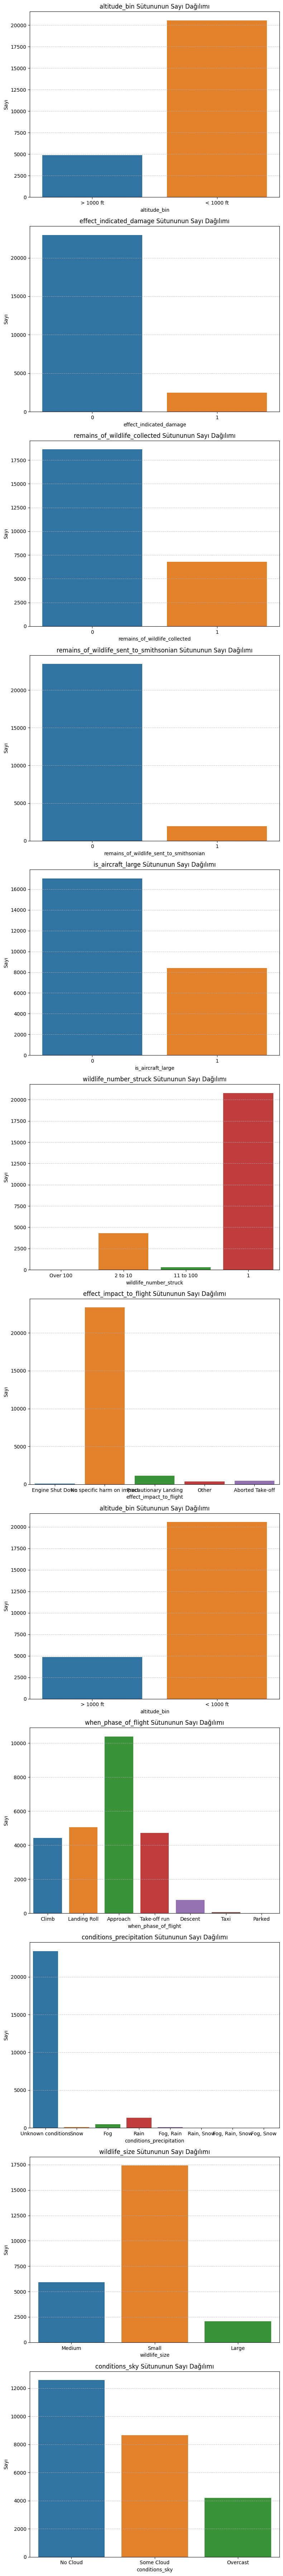

In [34]:
# Belirli sütunların listesi
data_columns = [
    'altitude_bin',
    'effect_indicated_damage',
    'remains_of_wildlife_collected',
    'remains_of_wildlife_sent_to_smithsonian',
    'is_aircraft_large',
    'wildlife_number_struck',
    'effect_impact_to_flight',
    'altitude_bin',
    'when_phase_of_flight',
    'conditions_precipitation',
    'wildlife_size',
    'conditions_sky',
]

# Yüzdelik dağılımları hesaplamak için boş bir liste oluşturduk
percentage_list = []

# Her sütun için yüzdelik dağılımları hesapladık
for column in data_columns:
    percentages = df[column].value_counts(normalize=True)
    percentage_list.append(percentages)

# Grafik düzeni için gerekli satır ve sütun sayısını belirledik
n_rows = len(data_columns)
n_cols = 1  # İstenilen sütun sayısını burada değiştirebiliriz

# Alt grafikler içeren bir şekil oluşturduk
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 6 * n_rows))

# Her sütun için yüzdelik dağılımı çizdirdik
for i, percentage in enumerate(percentage_list):
    ax = axes[i] if n_rows > 1 else axes  # Tek sıra durumu için düzeltildi
    sns.countplot(data=df, x=data_columns[i], ax=ax)
    ax.set_title(f'{data_columns[i]} Sütununun Sayı Dağılımı')
    ax.set_xlabel(data_columns[i])
    ax.set_ylabel('Sayı')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Grafik düzenini ayarladık
plt.tight_layout()

# Grafikleri gösterme
plt.show()


## 3.9. Sütun Bilgilerini İnceleme

In [35]:
columns = df.columns
for i in range(len(columns)):
    print(columns[i], len(df[columns[i]].unique()), df[columns[i]].dtype)

airport_name 1109 object
altitude_bin 2 object
aircraft_make_model 323 object
wildlife_number_struck 4 object
wildlife_number_struck_actual 106 int64
effect_impact_to_flight 5 object
effect_indicated_damage 2 int64
aircraft_number_of_engines 5 int64
aircraft_airline_operator 292 object
origin_state 61 object
when_phase_of_flight 7 object
conditions_precipitation 8 object
remains_of_wildlife_collected 2 int64
remains_of_wildlife_sent_to_smithsonian 2 int64
remarks 18076 object
wildlife_size 3 object
conditions_sky 3 object
wildlife_species 345 object
pilot_warned_of_birds_or_wildlife 2 int64
cost_total 792 int64
feet_above_ground 257 float64
number_of_people_injured 4 int64
is_aircraft_large 2 int64
year 12 float64
month 12 float64
day 31 float64
No_Damage_Flag 2 int64


# **4. Encoding ve Min-Max Scaling işlemleri**

## 4.1. One Hot Encoding Uygulaması

In [36]:
# Belirli sütunlarda One-Hot Encoding işlemi yapmak için ilgili sütunların adlarını içeren liste
OHE_columns = [
    'wildlife_number_struck',
    'effect_impact_to_flight',
    'when_phase_of_flight',
    'conditions_precipitation',
    'wildlife_size',
    'conditions_sky',
]

# Label Encoder nesnesi oluşturuldu
label_encoder = LabelEncoder()

# Her bir sütun için dönüşüm işlemi yapılıyor
for i in range(len(OHE_columns)):
    # İlgili sütun veri setinde ise işlem yapılmaktadır
    if OHE_columns[i] in columns:
        columns_name = df.columns
        encoder = OneHotEncoder()
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[OHE_columns[i]]]).toarray())
        encoded_columns = encoder_df.columns
        suffix = OHE_columns[i]
        encoded_columns = [suffix + "_" + str(item) for item in encoded_columns]
        encoder_df.columns = encoded_columns
        df.reset_index(drop=True, inplace=True)
        encoder_df.reset_index(drop=True, inplace=True)
        df = pd.concat([df, encoder_df], axis=1)
        df.drop(OHE_columns[i], axis=1, inplace=True)


## 4.2. Label Encoding Uygulaması

In [37]:
# 'altitude_bin' için Label Encoding (Sebebi: 2 değer var, rahat yapılacaktır.)
label_columns = ['altitude_bin']
label_encoder = LabelEncoder()
for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [38]:
df

,airport_name,altitude_bin,aircraft_make_model,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,aircraft_airline_operator,origin_state,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,remarks,wildlife_species,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag,wildlife_number_struck_0,wildlife_number_struck_1,wildlife_number_struck_2,wildlife_number_struck_3,effect_impact_to_flight_0,effect_impact_to_flight_1,effect_impact_to_flight_2,effect_impact_to_flight_3,effect_impact_to_flight_4,when_phase_of_flight_0,when_phase_of_flight_1,when_phase_of_flight_2,when_phase_of_flight_3,when_phase_of_flight_4,when_phase_of_flight_5,when_phase_of_flight_6,conditions_precipitation_0,conditions_precipitation_1,conditions_precipitation_2,conditions_precipitation_3,conditions_precipitation_4,conditions_precipitation_5,conditions_precipitation_6,conditions_precipitation_7,wildlife_size_0,wildlife_size_1,wildlife_size_2,conditions_sky_0,conditions_sky_1,conditions_sky_2
0,LAGUARDIA NY,1,B-737-400,859,1,2,US AIRWAYS*,New York,0,0,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Unknown bird - medium,0,30736,1500.0,0,1,2000.0,11.0,23.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,DALLAS/FORT WORTH INTL ARPT,0,MD-80,424,1,2,AMERICAN AIRLINES,Texas,0,0,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Rock pigeon,1,0,0.0,0,0,2001.0,7.0,25.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,LAKEFRONT AIRPORT,0,C-500,261,0,2,BUSINESS,Louisiana,0,0,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,European starling,0,0,50.0,0,0,2001.0,9.0,14.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,SEATTLE-TACOMA INTL,0,B-737-400,806,0,2,ALASKA AIRLINES,Washington,1,0,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",European starling,1,0,50.0,0,1,2002.0,9.0,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,NORFOLK INTL,0,CL-RJ100/200,942,0,2,COMAIR AIRLINES,Virginia,0,0,NO DMG REPTD.,European starling,0,0,50.0,0,0,2003.0,6.0,23.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,SACRAMENTO INTL,0,B-737-700,1,0,2,SOUTHWEST AIRLINES,California,1,1,ID BY SMITHSONIAN. SAMPLES FROM BOTH A/C AND B...,Mallard,1,0,10.0,0,1,2011.0,12.0,29.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25424,REDDING MUNICIPAL,1,EMB-120,1,0,2,SKYWEST AIRLINES,California,0,0,DUCK? NO DMG REPTD.,Unknown bird - large,0,0,1500.0,0,0,2011.0,12.0,30.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
25425,ORLANDO INTL,0,A-321,1,0,2,US AIRWAYS,Florida,0,0,No remark,Tree swallow,1,0,0.0,0,0,2011.0,12.0,30.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
25426,DETROIT METRO WAYNE COUNTY ARPT,0,B-757-200,1,0,2,DELTA AIR LINES,Michigan,0,0,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Unknown bird - medium,1,0,0.0,0,1,2011.0,12.0,31.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


## 4.3. Büyük Sütunları Silme İşlemi

**8 den fazla 'object' içeren sütunlar silindi. Bu şekilde makine öğrenmesini daha istikrarlı hale getirdik.**

In [39]:
for column in df.columns:
    if df[column].dtype == 'object' and df[column].nunique() > 8:
        print(column)
        df = df.drop(columns=column)

airport_name
aircraft_make_model
aircraft_airline_operator
origin_state
remarks
wildlife_species


In [40]:
df

,altitude_bin,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag,wildlife_number_struck_0,wildlife_number_struck_1,wildlife_number_struck_2,wildlife_number_struck_3,effect_impact_to_flight_0,effect_impact_to_flight_1,effect_impact_to_flight_2,effect_impact_to_flight_3,effect_impact_to_flight_4,when_phase_of_flight_0,when_phase_of_flight_1,when_phase_of_flight_2,when_phase_of_flight_3,when_phase_of_flight_4,when_phase_of_flight_5,when_phase_of_flight_6,conditions_precipitation_0,conditions_precipitation_1,conditions_precipitation_2,conditions_precipitation_3,conditions_precipitation_4,conditions_precipitation_5,conditions_precipitation_6,conditions_precipitation_7,wildlife_size_0,wildlife_size_1,wildlife_size_2,conditions_sky_0,conditions_sky_1,conditions_sky_2
0,1,859,1,2,0,0,0,30736,1500.0,0,1,2000.0,11.0,23.0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,424,1,2,0,0,1,0,0.0,0,0,2001.0,7.0,25.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0,261,0,2,0,0,0,0,50.0,0,0,2001.0,9.0,14.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0,806,0,2,1,0,1,0,50.0,0,1,2002.0,9.0,5.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,942,0,2,0,0,0,0,50.0,0,0,2003.0,6.0,23.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,0,1,0,2,1,1,1,0,10.0,0,1,2011.0,12.0,29.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25424,1,1,0,2,0,0,0,0,1500.0,0,0,2011.0,12.0,30.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
25425,0,1,0,2,0,0,1,0,0.0,0,0,2011.0,12.0,30.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
25426,0,1,0,2,0,0,1,0,0.0,0,1,2011.0,12.0,31.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
df = df.astype(int) # Bütün sütunlar int değerine dönüştürüldü

##4.4. Gerekli Sütunlara Min-Max Scaler Uygulaması

In [42]:
unique_value_counts = df.nunique() # Her sütunun benzersiz değer sayısını içeren bir Seri döndürdük
print(unique_value_counts) # Benzersiz değer sayılarını görüntüleme

altitude_bin                                 2
wildlife_number_struck_actual              106
effect_indicated_damage                      2
aircraft_number_of_engines                   5
remains_of_wildlife_collected                2
remains_of_wildlife_sent_to_smithsonian      2
pilot_warned_of_birds_or_wildlife            2
cost_total                                 792
feet_above_ground                          257
number_of_people_injured                     4
is_aircraft_large                            2
year                                        12
month                                       12
day                                         31
No_Damage_Flag                               2
wildlife_number_struck_0                     2
wildlife_number_struck_1                     2
wildlife_number_struck_2                     2
wildlife_number_struck_3                     2
effect_impact_to_flight_0                    2
effect_impact_to_flight_1                    2
effect_impact

'wildlife_number_struck_actual',  'aircraft_number_of_engines',
 'cost_total', 'feet_above_ground',  'number_of_people_injured', 'year', 'month', 'day' **Sütunlarını incelediğimizde değerler büyük durmaktadır. Bundan dolayı Min-Max Scaler methodu ile yeninden yazdırılacaktır.**                                      

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max ölçeklendirme nesnesini oluşturduk
scaler = MinMaxScaler()

# Dönüştürmek istediğiniz sütunların listesini oluşturduk
columns_to_scale = [
    'wildlife_number_struck_actual',
    'aircraft_number_of_engines',
    'cost_total',
    'feet_above_ground',
    'number_of_people_injured',
    'year',
    'month',
    'day'
]

# Veri çerçevesinin sadece belirtilen sütunlarını seçin ve Min-Max ölçeklendirme uyguladık
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])



In [44]:
df

,altitude_bin,wildlife_number_struck_actual,effect_indicated_damage,aircraft_number_of_engines,remains_of_wildlife_collected,remains_of_wildlife_sent_to_smithsonian,pilot_warned_of_birds_or_wildlife,cost_total,feet_above_ground,number_of_people_injured,is_aircraft_large,year,month,day,No_Damage_Flag,wildlife_number_struck_0,wildlife_number_struck_1,wildlife_number_struck_2,wildlife_number_struck_3,effect_impact_to_flight_0,effect_impact_to_flight_1,effect_impact_to_flight_2,effect_impact_to_flight_3,effect_impact_to_flight_4,when_phase_of_flight_0,when_phase_of_flight_1,when_phase_of_flight_2,when_phase_of_flight_3,when_phase_of_flight_4,when_phase_of_flight_5,when_phase_of_flight_6,conditions_precipitation_0,conditions_precipitation_1,conditions_precipitation_2,conditions_precipitation_3,conditions_precipitation_4,conditions_precipitation_5,conditions_precipitation_6,conditions_precipitation_7,wildlife_size_0,wildlife_size_1,wildlife_size_2,conditions_sky_0,conditions_sky_1,conditions_sky_2
0,1,0.911796,1,0.142857,0,0,0,0.002479,0.083333,0.0,1,0.000000,0.909091,0.733333,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0.449522,1,0.142857,0,0,1,0.000000,0.000000,0.0,0,0.090909,0.545455,0.800000,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,0,0.276302,0,0.142857,0,0,0,0.000000,0.002778,0.0,0,0.090909,0.727273,0.433333,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
3,0,0.855473,0,0.142857,1,0,1,0.000000,0.002778,0.0,1,0.181818,0.727273,0.133333,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0,1.000000,0,0.142857,0,0,0,0.000000,0.002778,0.0,0,0.272727,0.454545,0.733333,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25423,0,0.000000,0,0.142857,1,1,1,0.000000,0.000556,0.0,1,1.000000,1.000000,0.933333,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
25424,1,0.000000,0,0.142857,0,0,0,0.000000,0.083333,0.0,0,1.000000,1.000000,0.966667,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
25425,0,0.000000,0,0.142857,0,0,1,0.000000,0.000000,0.0,0,1.000000,1.000000,0.966667,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
25426,0,0.000000,0,0.142857,0,0,1,0.000000,0.000000,0.0,1,1.000000,1.000000,1.000000,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1


# **6. Kolerasyon Matrix'i Oluşturma**

In [44]:
df_lr = df.copy()
df.columns

Index(['altitude_bin', 'wildlife_number_struck_actual',
       'effect_indicated_damage', 'aircraft_number_of_engines',
       'remains_of_wildlife_collected',
       'remains_of_wildlife_sent_to_smithsonian',
       'pilot_warned_of_birds_or_wildlife', 'cost_total', 'feet_above_ground',
       'number_of_people_injured', 'is_aircraft_large', 'year', 'month', 'day',
       'No_Damage_Flag', 'wildlife_number_struck_0',
       'wildlife_number_struck_1', 'wildlife_number_struck_2',
       'wildlife_number_struck_3', 'effect_impact_to_flight_0',
       'effect_impact_to_flight_1', 'effect_impact_to_flight_2',
       'effect_impact_to_flight_3', 'effect_impact_to_flight_4',
       'when_phase_of_flight_0', 'when_phase_of_flight_1',
       'when_phase_of_flight_2', 'when_phase_of_flight_3',
       'when_phase_of_flight_4', 'when_phase_of_flight_5',
       'when_phase_of_flight_6', 'conditions_precipitation_0',
       'conditions_precipitation_1', 'conditions_precipitation_2',
       'condit

In [45]:
df_RFE = df.copy()

In [46]:
estimator = LogisticRegression(max_iter=1000)
X_RFE = df_RFE.drop(['effect_indicated_damage'], axis=1)
y_RFE = df_RFE['effect_indicated_damage']
rfe = RFE(estimator, n_features_to_select=10)  # Specify the desired number of features
rfe.fit(X_RFE, y_RFE)
feature_ranking = rfe.ranking_
selected_features = X_RFE.columns[rfe.support_]
selected_features

Index(['remains_of_wildlife_sent_to_smithsonian', 'cost_total',
       'No_Damage_Flag', 'wildlife_number_struck_1',
       'wildlife_number_struck_3', 'effect_impact_to_flight_1',
       'effect_impact_to_flight_2', 'when_phase_of_flight_6',
       'wildlife_size_0', 'wildlife_size_2'],
      dtype='object')

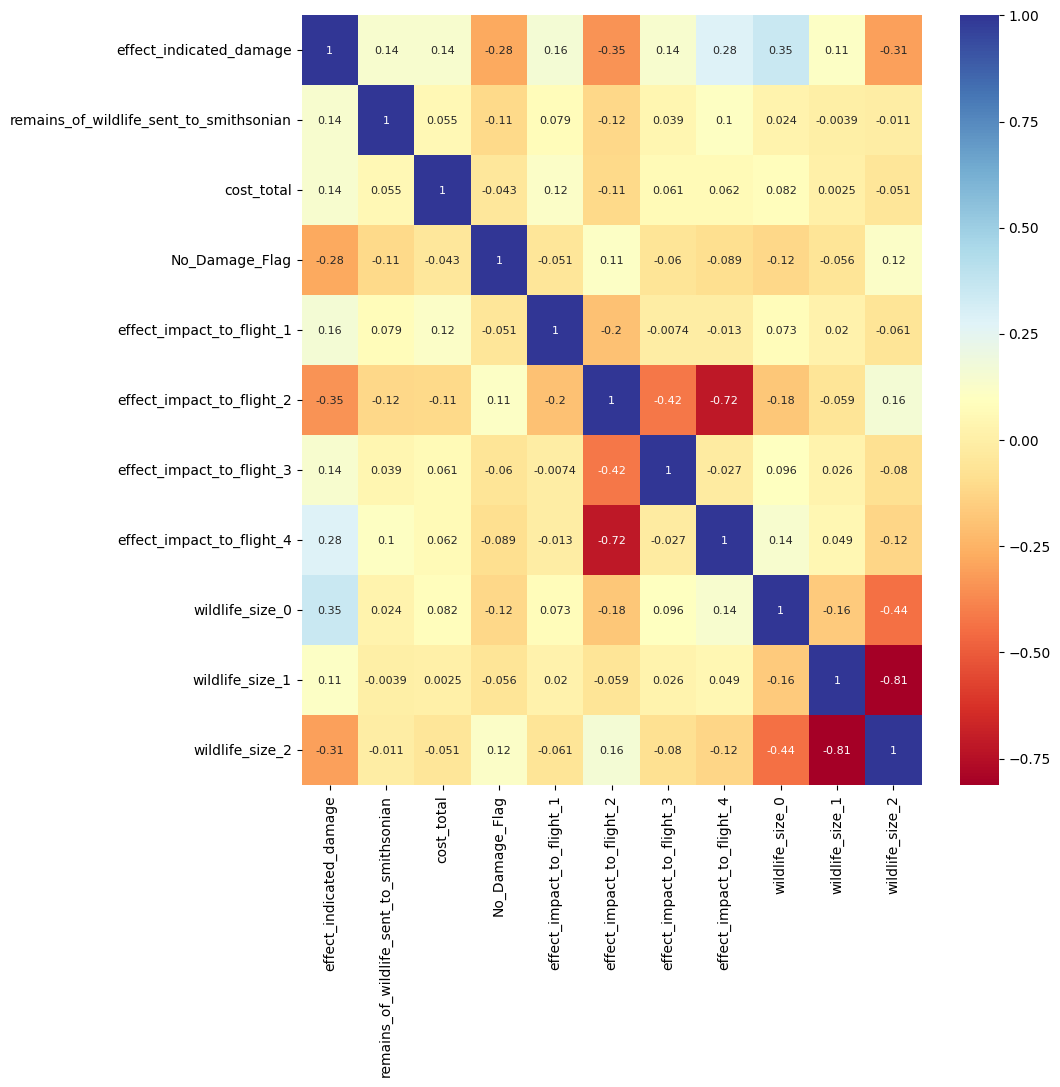

In [47]:
corr_matrix = df.corr(method='pearson')
correlation_target = corr_matrix["effect_indicated_damage"].abs()
drop_columns = correlation_target[correlation_target < 0.1].index
df = df.drop(columns=drop_columns)
corr_matrix_updated = df.corr(method='pearson')
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix_updated, annot = True, cmap = 'RdYlBu', annot_kws={"size": 8})
plt.show()

In [48]:
df.dropna(subset=['effect_indicated_damage'], inplace=True)
X = df.drop(['effect_indicated_damage'], axis=1)
y = df['effect_indicated_damage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
X_train_resampled

,remains_of_wildlife_sent_to_smithsonian,cost_total,No_Damage_Flag,effect_impact_to_flight_1,effect_impact_to_flight_2,effect_impact_to_flight_3,effect_impact_to_flight_4,wildlife_size_0,wildlife_size_1,wildlife_size_2
0,0,-0.045539,1,0,1,0,0,0,0,1
1,0,-0.045539,1,0,1,0,0,0,1,0
2,0,-0.045539,1,0,1,0,0,0,0,1
3,0,-0.045539,0,0,1,0,0,0,0,1
4,0,-0.045539,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
30753,0,-0.045539,0,0,0,0,1,0,1,0
30754,0,-0.045539,0,0,1,0,0,0,1,0
30755,1,-0.045539,0,0,0,0,1,0,1,0
30756,0,8.065802,0,0,0,0,0,0,1,0


In [97]:
X_test

,remains_of_wildlife_sent_to_smithsonian,cost_total,No_Damage_Flag,effect_impact_to_flight_1,effect_impact_to_flight_2,effect_impact_to_flight_3,effect_impact_to_flight_4,wildlife_size_0,wildlife_size_1,wildlife_size_2
22787,1,-0.045539,1,0,1,0,0,0,0,1
4191,0,-0.045539,0,0,1,0,0,0,0,1
23250,0,-0.045539,1,0,1,0,0,0,0,1
11608,0,-0.045539,0,0,1,0,0,0,1,0
1822,0,-0.045539,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9770,0,-0.045539,0,0,1,0,0,1,0,0
19578,0,-0.045539,0,0,1,0,0,0,0,1
15478,0,-0.044770,1,0,1,0,0,0,0,1
25098,0,-0.045539,1,0,1,0,0,0,1,0


In [101]:
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
model.fit(X_train_resampled, y_train_resampled)

pred_test = model.predict(X_test)
pred_train = model.predict(X_train)
f1_score(y_test, pred_test),f1_score(y_train, pred_train)

(0.5757097791798107, 0.5759937646141854)

In [100]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_train)
y_pred_rf_test = rf_classifier.predict(X_test)
f1_score(y_test, y_pred_rf_test), f1_score(y_train, y_pred_rf)

(0.6050955414012739, 0.6252909231962761)

In [88]:

# Assuming you have your features X and target y

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation with, for example, 5 folds
cv_f1_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='f1')

# Print the cross-validation F1 scores
print("Cross-validation F1 scores:", cv_f1_scores)

# Calculate the mean and standard deviation of the F1 scores
mean_cv_f1 = cv_f1_scores.mean()
std_cv_f1 = cv_f1_scores.std()

print(f"Mean CV F1 Score: {mean_cv_f1:.4f}")
print(f"Std CV F1 Score: {std_cv_f1:.4f}")


Cross-validation F1 scores: [0.58866995 0.59895833 0.62023653 0.58453473 0.56266667]
Mean CV F1 Score: 0.5910
Std CV F1 Score: 0.0188


In [95]:
clf = KNeighborsClassifier(n_neighbors=5)
k_fold = 5
f1_knn_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='f1')
mean_cv_f1_knn = f1_knn_scores.mean()
std_deviation_knn = f1_knn_scores.std()
clf.fit(X_train_resampled, y_train_resampled)
final_accuracy = clf.score(X_test, y_test)
mean_cv_f1_knn, std_deviation, final_accuracy

(0.5327309605501445, 0.1789145915497911, 0.9358913250714966)

In [89]:
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
confusion = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9409
Precision: 0.8279
Recall: 0.4768
F1 Score: 0.6051
